# Project: [Auto Mpg data Analysis]
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Exploring">Exploring</a></li>
<li><a href="#Exploring Summary">Exploring Summary</a></li>
<li><a href="#cleaning">cleaninig</a></li>    
<li><a href="#visualize">visualization</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
  
</ul>

<a id='intro'></a>


## Introduction

### Dataset Description 

> `mpg` Miles per galon of fuel

> `cylinders` Number of engine cylinders .A cylinder is a crucial part of the engine where fuel is combusted and power is generated. It consists of a piston, an inlet, and exhaust valves at the top.

>`Horsepower` Refers to the power an engine produces. 

> `weight`: Weight of car

>`Acceleration`: The acceleration an engine can get per second

>`model year`  Car release year from 1970 to 1982

>`origin` Car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) 

>`car name`:Car model name (unique for each instance)


*The data is from https://www.kaggle.com/uciml/autompg-dataset*

# Setting up the notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
sns.set_style("darkgrid")
sns.set_context("poster")

In [2]:
# Loading data
df=pd.read_csv("auto-mpg.csv" )

<a id='Exploring'></a>
# Exploring Data
## I will check the  things below to Understand the Dataset:

* shape of our dataset
* Head of the dataset
* Number of samples in each dataset
* Number of columns in each dataset
* Duplicate rows in each dataset
* Datatypes of columns
* Features with missing values
* Number of non-null unique values for features in each dataset
* What those unique values are and counts for each

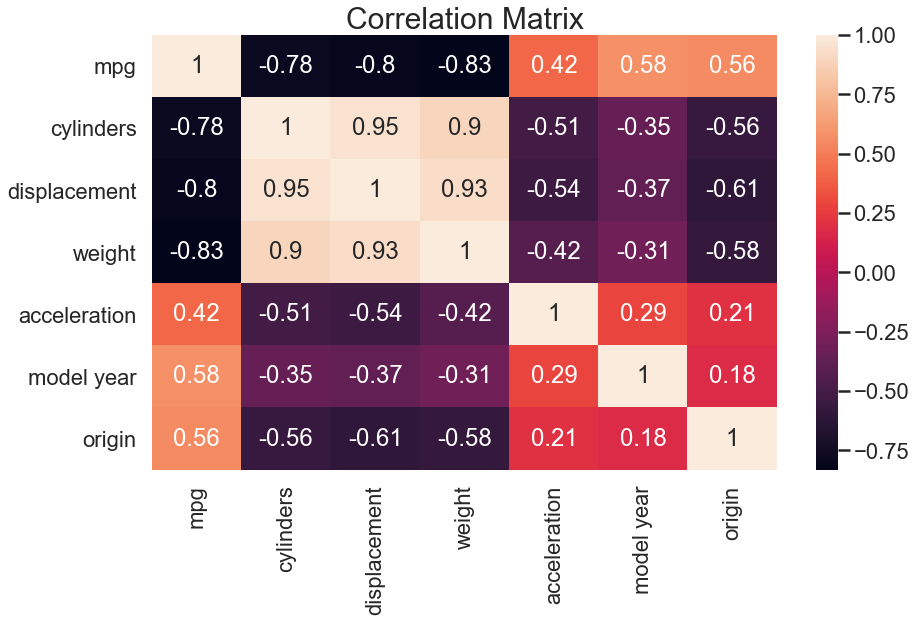

In [3]:
#Heat map Corr will state more insights 
f, ax = plt.subplots(figsize= [14, 8])
ax.set_title("Correlation Matrix", fontsize=30)
sns.heatmap(df.corr(),annot=True);

> ##### From abave the displacement, horsepower and weight have strong negative relationship, which might consist multicolinearity within them. Also, acceleration is not much signifcant in predicting mpg.

In [4]:
# view dimensions of dataset
df.shape

(398, 9)

###  Based on the cell above 
#### The data set being  has**`398 records/cells`**  and **`9 columns/variables`**in our data frame.

In [5]:
# taking a look at the data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# To check the Information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
#Check column names
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
# Check if the data contain duplicated row or not 
df.duplicated().sum()

0

<a id='Exploring Summary'></a>
## Exploring Summary

### From the above I noticed that :
#####  There is Nothing missing values!

##### Although the values in `Horsepower` column we saw above were clearly numbers , the column is object and not a float or int,So, Let's look at the unique elements of horsepower to look for discrepancies. 
##### There is Nothing duplicated values!
##### `car_name` column would need to be dropped.
##### The `Origin` column would need to be parsed and casted into a categorical datatype.

<a id='cleaning'></a>

## Cleaning data :

Here, I'd perform cleaning operations ,which would help me to reach a more accurate result in creating meaningful and informative visualizations.

> ### removing spaces from column names :


In [9]:
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [10]:
df['car_name'].nunique()

305

> ### clean `car_name` column :
> ##### Now, I'll drop car_name feature from the data as it has a lot of unique names .

In [11]:
df.drop('car_name', axis=1, inplace=True)

> ### clean `horsepower` column :

In [12]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
(df["horsepower"]=='?').sum()

6

 > * `horsepower` column contain 6 `?`, and that is what is giving us the object data type instead of int.

In [14]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
(df["horsepower"]=='?').sum()

0

In [15]:
# fill 'NaN' value with mode
df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)

In [16]:
# fill '?' value with mode
# df["horsepower"].replace('?',(df["horsepower"].mode()[0]),inplace=True)
# confirming changes
#(df["horsepower"]=='?').sum()

In [17]:
df["horsepower"]=df["horsepower"].astype("int")
# confirming changes
df["horsepower"].dtypes

dtype('int32')

> ### clean `origin` column:
>> * According to the provided description (1 -> `USA`, 2 -> `Europe`, 3 -> `Asia`)

In [18]:
# parsing
df['origin']=df['origin'].replace(1,"USA")
df['origin']=df['origin'].replace(2,"Europe")
df['origin']=df['origin'].replace(3,"Asia")

In [19]:
# casting its datatype as category
df['origin'] = df['origin'].astype('category')
# confirming changes
df['origin'].value_counts()

USA       249
Asia       79
Europe     70
Name: origin, dtype: int64

In [20]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    int32   
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
dtypes: category(1), float64(3), int32(1), int64(3)
memory usage: 20.9 KB


Now, data is cleaning and ready for the next step `EDA`to get some meaningful insights!
>
>- There is No wrong data type
>- There is No NaN values 
>- All columns are cleaning 

<a id='visualize'></a>
## Time to visulization
#### In this section, I will use some informative visuals to help in drawing insights and conclusions about  data and also helping in EDA

In [22]:
# Now everything looks in order so lets continue, let's describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


### Step 1: Let's look at mpg

In [ ]:
df.mpg.describe()

> ##### So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8.

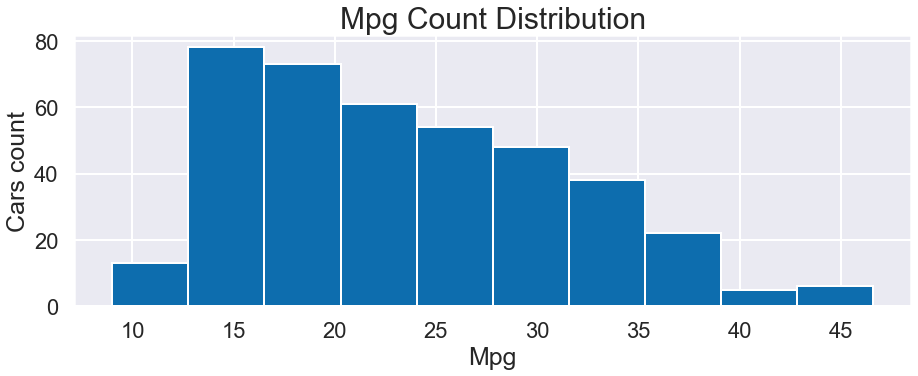

In [23]:
# displaying histgram of mpg column
sns.set_palette("GnBu_r")
plt.figure(figsize=(15,5))
df['mpg'].hist()
plt.title("Mpg Count Distribution", fontsize = 30)
plt.xlabel("Mpg", fontsize = 25)
plt.ylabel("Cars count", fontsize = 25);

> ##### Most cars have mpg between 15 to 20

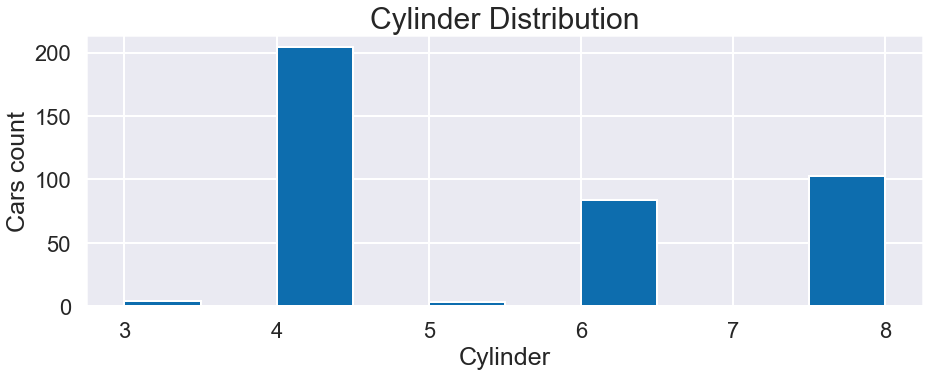

In [24]:
# displaying histgram of cylinder column
plt.figure(figsize=(15,5))
df['cylinders'].hist()
plt.title("Cylinder Distribution", fontsize = 30)
plt.xlabel("Cylinder", fontsize = 25)
plt.ylabel("Cars count", fontsize = 25);

> ##### Most cars have 4 cylinder engine.

#### Now, I will compare these findings together.

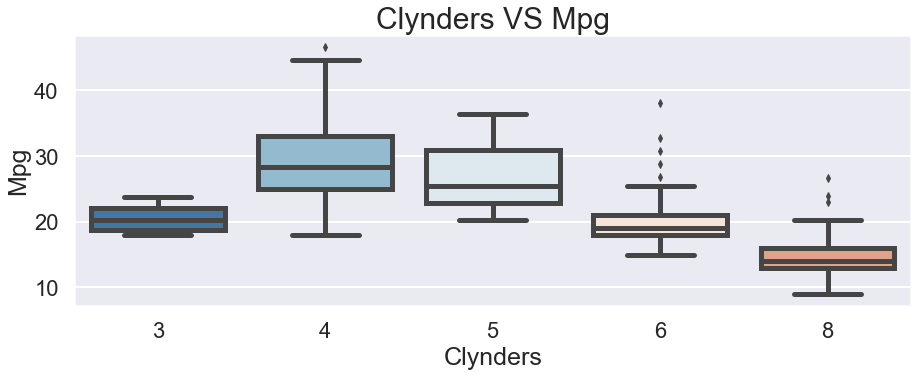

In [25]:
# ploting clynders VS mpg
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
sns.boxplot(x = 'cylinders', y = 'mpg', data = df, linewidth=5)
plt.title("Clynders VS Mpg", fontsize = 30)
plt.xlabel("Clynders", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25);

> ##### As `cylinders` in the engine increases above `4` ,`MPG` decreases

#### Now, let's take a closer look at `Model_year` coulmn and compare it with `Mpg` column.

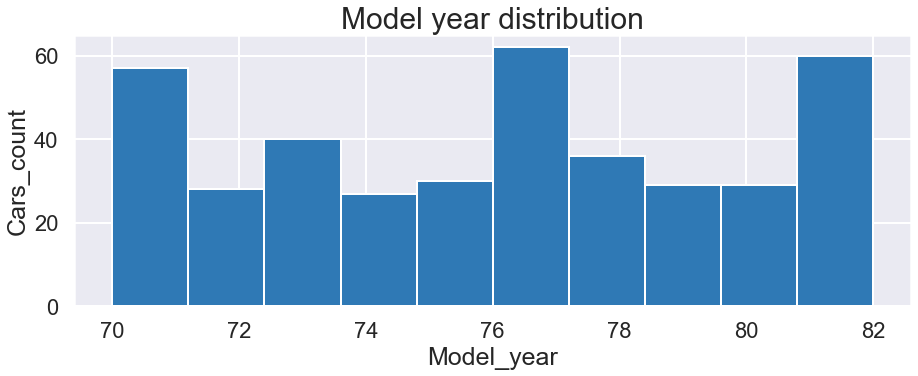

In [26]:
# displaying histgram of model_year column
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
plt.title("Model year distribution", fontsize = 30)
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Cars_count", fontsize = 25)
df['model_year'].hist();

> ##### The `Model_year` column contains info about cars from 1970 to 1982 and  most of  cars are produced in 1976.

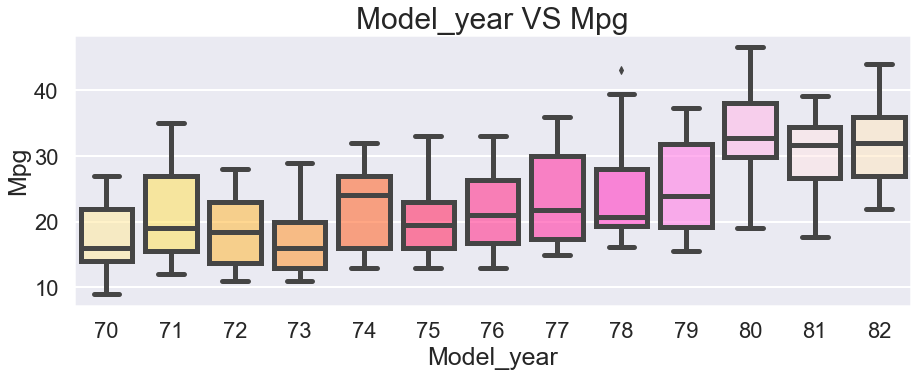

In [27]:
# ploting Model_year VS Mpg
sns.set_palette("GnBu")
plt.figure(figsize=(15,5))
ax=sns.boxplot(x = 'model_year', y = 'mpg', data = df, linewidth=5);
plt.title("Model_year VS Mpg", fontsize = 30)
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25)
# adding transparency to colors
for patch in ax.artists:
    r, g, b, m = patch.get_facecolor()
    patch.set_facecolor((m, r, b, g))

> ##### From year 1973, there has been a noticable increase in `Mpg`.(positive correlation)

#### Now, let's take a closer look at `Horsepower` column and compare it with `Mpg` column then with `Cylinders` column again

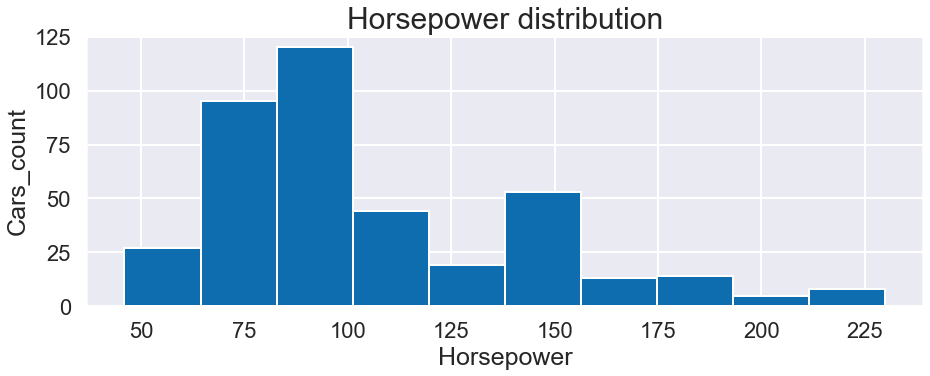

In [28]:
# displaying histgram of Horsepower column
#sns.set_palette("PRGn")
sns.set_palette("GnBu_r")
plt.figure(figsize=(15,5))
plt.title("Horsepower distribution", fontsize = 30)
plt.xlabel("Horsepower", fontsize = 25)
plt.ylabel("Cars_count", fontsize = 25)
df['horsepower'].hist();

> ##### There is Negative correlation between `Mpg` and `Horsepower`.
> ##### Higher `Mpg` has Lower `Horsepower`.

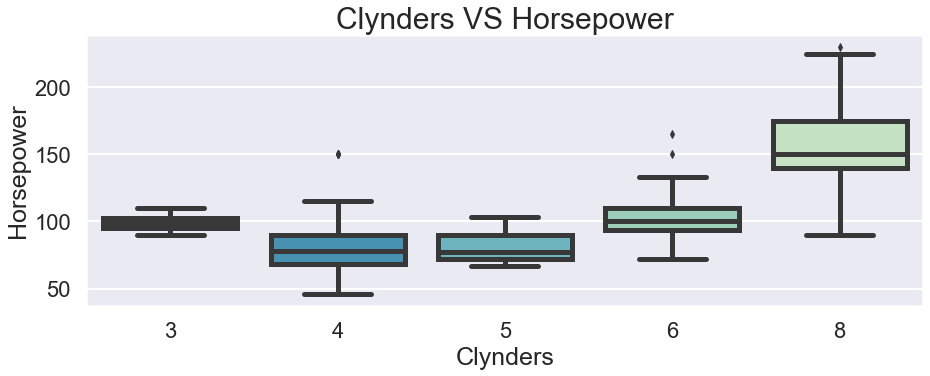

In [29]:
# ploting Cylinders VS Horsepower
sns.set_palette("GnBu_r")
plt.figure(figsize=(15,5))
plt.title("Clynders VS Horsepower", fontsize = 30)
sns.boxplot(x = 'cylinders', y = 'horsepower', data = df, linewidth=5)
plt.xlabel("Clynders", fontsize = 25)
plt.ylabel("Horsepower", fontsize = 25);

> ##### As `Cylinders` in the engine increases above 4, `Engine Horsepower` increases.

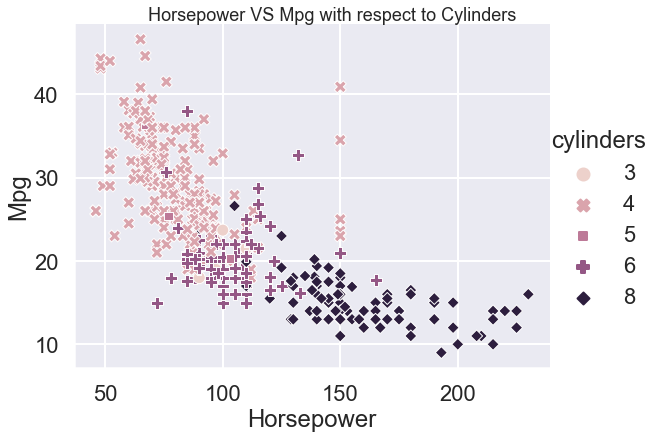

In [30]:
# ploting Horsepower VS Mpg with respect to cylinders
ax=sns.relplot(x = 'horsepower', y = 'mpg', hue='cylinders',height=6,aspect=1.30, data = df, kind="scatter", style="cylinders")
ax.fig.suptitle("Horsepower VS Mpg with respect to Cylinders", fontsize = 18)
ax.set(xlabel="Horsepower",ylabel="Mpg");

> ##### Confirming the above, the increase in `Cylinders` and `Horsepower` decreases the `Mpg`.

#### Now, I'll explore `origin` column to find insights about each manufacturing country and then explore its relations between other columns.

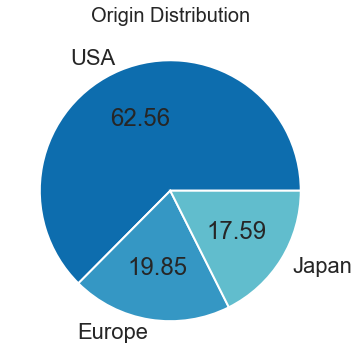

In [31]:
# ploting cars origin dist.
plt.figure(figsize=[14, 6])
plt.title("Origin Distribution", fontsize = 20)
plt.pie(x=df['origin'].value_counts(), autopct="%.2f", labels=['USA', 'Europe', 'Japan']);

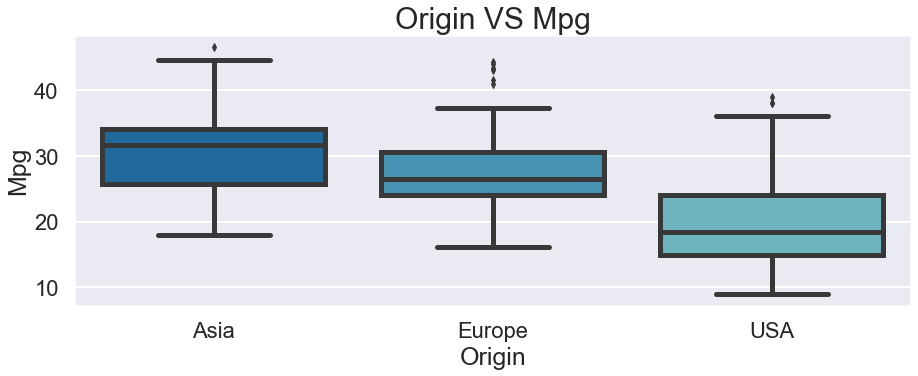

In [32]:
# ploting Origin VS Mpg
plt.figure(figsize=(15,5))
sns.set_palette("GnBu_r")
plt.title("Origin VS Mpg", fontsize = 30)
sns.boxplot(x = 'origin', y = 'mpg', data =df, linewidth=5)
plt.xlabel("Origin", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25);

> ##### `Asia` produces cars with the highest `Mpg`, followed by `Europe` and finally the `USA` with the lowest  `Mpg` 

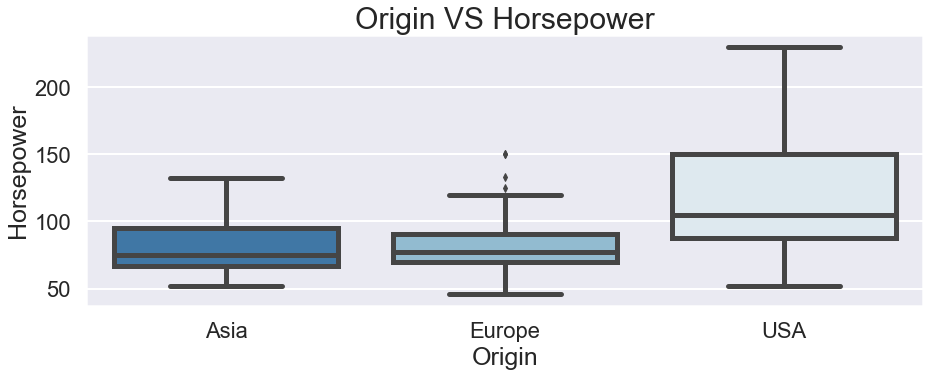

In [33]:
# ploting Origin VS Horsepower
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
plt.title("Origin VS Horsepower", fontsize = 30)
sns.boxplot(x = 'origin', y = 'horsepower', data = df, linewidth=5)
plt.xlabel("Origin", fontsize = 25)
plt.ylabel("Horsepower", fontsize = 25);

> ##### As expected, `USA` has the highest engine `Horsepower` followed by `Europe` and finally the `Asia` with the lowest engine `Horsepower`. This implies the previously observed conclusion that `Hoursepower` and `Mpg` has a negative correlation.

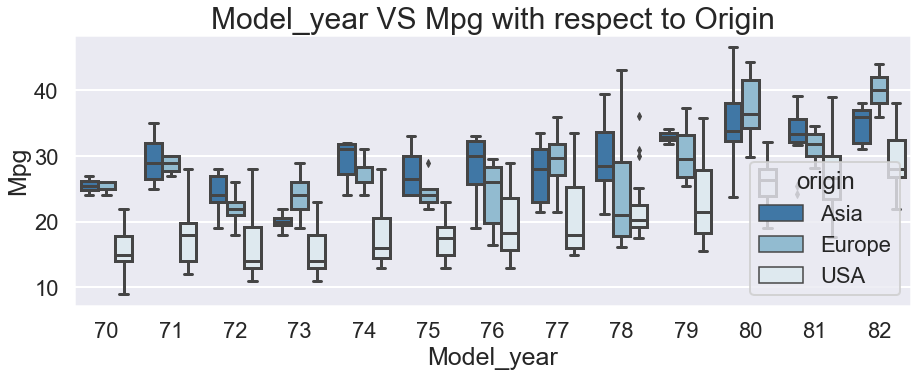

In [34]:
# ploting model_year VS Mpg with respect to origin
plt.figure(figsize=(15,5))
plt.title("Model_year VS Mpg with respect to Origin", fontsize = 30)
sns.boxplot(x = 'model_year', y = 'mpg', hue = 'origin', data =df)
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25);

> ##### This plot confirms the positive correlation between `Model_year` and `Mpg`, and shows that `Asia` is the largest in this industry, followed by `Europe` and `USA` comes in the last place.

#### Now I will explore how `Weight` has been affecting  `Car Specifications` over the years.

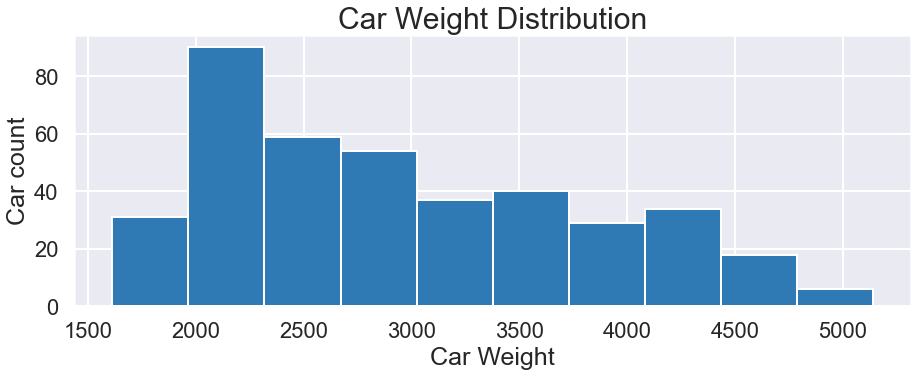

In [35]:
# displaying histgram of weight column
plt.figure(figsize=(15,5))
plt.title("Car Weight Distribution", fontsize = 30)
plt.xlabel("Car Weight", fontsize = 25)
plt.ylabel("Car count", fontsize = 25)
df['weight'].hist();

> #####   The majority of cars weight at `2000`.

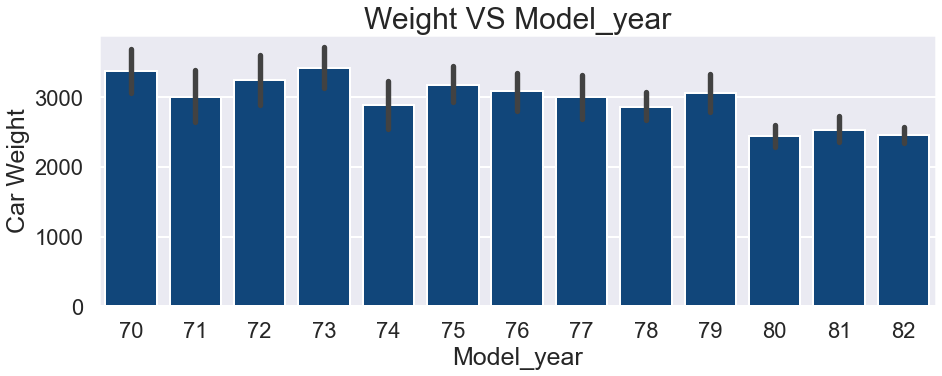

In [36]:
# plotting Weight VS Model_year
plt.figure(figsize=(15,5))
plt.title("Weight VS Model_year", fontsize = 30)
sns.barplot(x = 'model_year', y = 'weight', data = df,color="#00468b")
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Car Weight", fontsize = 25);

> ##### `Car Weight` has been decreasing over the years.

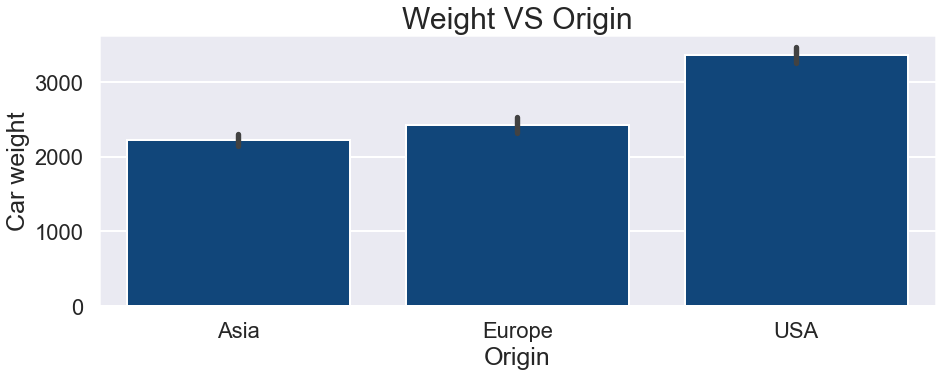

In [37]:
# plotting Weight VS Origin
plt.figure(figsize=(15,5))
plt.title("Weight VS Origin", fontsize = 30)
sns.barplot(x = 'origin', y = 'weight', data =df,color="#00468b")
plt.xlabel("Origin", fontsize = 25)
plt.ylabel("Car weight", fontsize = 25);

> ##### As expected, `USA` gets the highest possible weight values, that explains alot about its low `Mpg` and high `Horsepower` & `cylinders`.
`Asia` produces the lightest cars compared to `USA` and `Europe`, this also explains it's high `Mpg` and low `Horsepower`& `cylinders`.

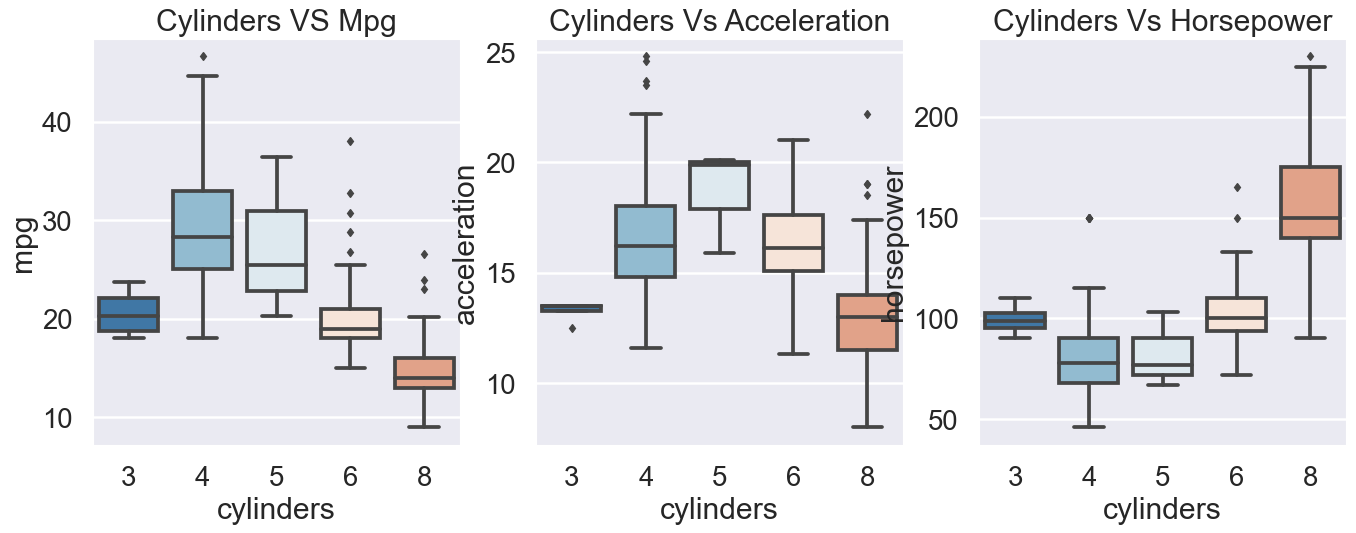

In [38]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.boxplot(x="cylinders", y="mpg", data=df, ax=axes[0])
axes[0].set_title("Cylinders VS Mpg")

sns.boxplot(x="cylinders", y="acceleration", data=df, ax=axes[1])
axes[1].set_title("Cylinders Vs Acceleration")

sns.boxplot(x="cylinders", y="horsepower", data=df, ax=axes[2])
axes[2].set_title("Cylinders Vs Horsepower")

plt.show()

> Cars with 4 `Cylinders` have highest `Mpg`.

> Cars with 5 `Cylinders` have highest `Acceleration`.

> cars with 8`Cylinder `  have higher `Horsepower`.

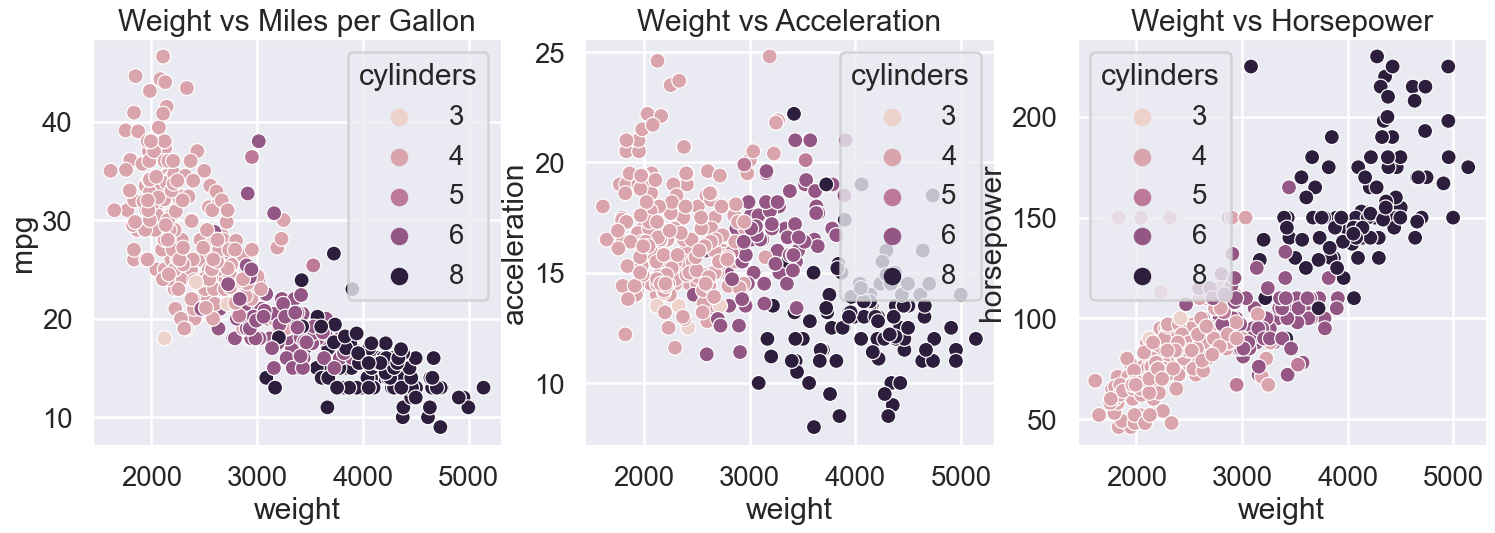

In [39]:
fig, axes = plt.subplots(figsize=(20, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df, hue="cylinders", ax=axes[0])
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=df, hue="cylinders", ax=axes[1])
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=df, hue="cylinders", ax=axes[2])
axes[2].set_title("Weight vs Horsepower")

plt.show()

>Higher `Weight` has Lower `Mpg`.

>Higher `Weight` has Slower `Acceleration`.

>`Heavier Cars have Higher Horsepower`.

<a id='Conclusion'></a>
# Conclusion
### From the previous visualisations I conclude that:
##### As years pass after 1973, there has been a noticable increase in mpg.

##### As cylinders in the engine increases above 4, MPG decreases and engine horsepower increases. That indicates negative correlation between mpg and horsepower.

##### mpg increases as weight decreses over time, that also indecates a strong correlation between them.

##### The greater weight of car, greater it's horsepower,greater it's Cylnders and the lower it's Speed and Mpg.

##### Althogh USA has the biggest count of produced cars, its cars has relatively very low mpg  over the years, thus the highest possible weight , Horsepower and cylinders. compared to Asia and Europe.

##### Asia is the largest in the production of cars with the highest Mpg with the lowest engine Horsepower ,cylinders and with the lightest cars.compared to USA and Europe.